<a href="https://colab.research.google.com/github/mrasifimran/Machine-Learning/blob/main/crimerates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/crimedata'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
import plotly.express as px
import plotly.graph_objects as go
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS

# Data Loading

In [ ]:
url = ' https://drive.google.com/file/d/1IHb1Dw5CW7q1eFiuh2IT_0qtr0uidmTW/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
df

area_name  year  dacoity  robbery   murder  speedy_trial  \
0         dhaka metropolitan  2010       47       220     245           363   
1    chittagong metropolitan  2010       16       108      94            31   
2        khulna metropolitan  2010        3         9      29            25   
3      rajshahi metropolitan  2010        4        20      21             9   
4       barisal metropolitan  2010        8        12      19            21   
..                       ...   ...      ...       ...     ...           ...   
141        rajshahi division  2019        5         8      29             6   
142         rangpur division  2019        1         2      33             0   
143            railway range  2019        0         1       2             0   
144    gazipur  metropolitan  2019        2         3       3             1   
145     rangpur metropolitan  2019        0         0       1             0   

     riot   woman_child_Repression  kidnapping  police_assault  burglary  \
0        3                    1370         139             155       555   
1        7                     455          37              31       123   
2        0                     153          11               4        65   
3       15                     157           9              12        53   
4        0                     112           6               8        24   
..     ...                     ...         ...             ...       ...   
141      0                      99           8               2         5   
142      0                     116           0               0         8   
143      0                       0           0               0         0   
144      0                      22           1               2         2   
145      0                      12           1               0         0   

     theft  other_cases  recovery_cases_arms_act  recovery_cases_explosive  \
0     1915         7228                      518                        82   
1      314         1831                       51                         0   
2       91          551                       19                         2   
3      106          578                        3                         4   
4       83          557                       17                         0   
..     ...          ...                      ...                       ...   
141     40          469                       25                        15   
142     38          625                        4                         0   
143      5            9                        0                         0   
144      8           65                        3                         0   
145      6           33                        0                         0   

     recovery_cases_narcotics  recovery_cases_smuggling  
0                       10535                       144  
1                         866                        99  
2                         792                        13  
3                         332                       248  
4                         155                       117  
..                        ...                       ...  
141                      1166                       134  
142                       551                        94  
143                        55                        12  
144                       130                         2  
145                        68                         0  

[146 rows x 17 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   area_name                 146 non-null    object
 1   year                      146 non-null    int64 
 2   dacoity                   146 non-null    int64 
 3   robbery                   146 non-null    int64 
 4   murder                    146 non-null    int64 
 5   speedy_trial              146 non-null    int64 
 6   riot                      146 non-null    int64 
 7   woman_child_Repression    146 non-null    int64 
 8   kidnapping                146 non-null    int64 
 9   police_assault            146 non-null    int64 
 10  burglary                  146 non-null    int64 
 11  theft                     146 non-null    int64 
 12  other_cases               146 non-null    int64 
 13  recovery_cases_arms_act   146 non-null    int64 
 14  recovery_cases_explosive  

In [ ]:
df.isna().sum()

area_name                   0
year                        0
dacoity                     0
robbery                     0
murder                      0
speedy_trial                0
riot                        0
woman_child_Repression      0
kidnapping                  0
police_assault              0
burglary                    0
theft                       0
other_cases                 0
recovery_cases_arms_act     0
recovery_cases_explosive    0
recovery_cases_narcotics    0
recovery_cases_smuggling    0
dtype: int64

In [ ]:
df.describe()

year     dacoity    robbery        murder  speedy_trial  \
count   146.000000  146.000000  146.000000   146.000000    146.000000   
mean   2014.746575   32.143836   56.232877   248.856164     93.589041   
std       2.900206   42.779787   62.354718   307.630342    118.006351   
min    2010.000000    0.000000    0.000000     0.000000      0.000000   
25%    2012.000000    3.000000   11.000000    24.250000      9.250000   
50%    2015.000000   16.500000   30.000000   142.500000     51.500000   
75%    2017.000000   44.750000   73.750000   348.000000    131.750000   
max    2019.000000  184.000000  294.000000  1395.000000    563.000000   

            riot   woman_child_Repression  kidnapping  police_assault  \
count  146.000000              146.000000  146.000000      146.000000   
mean     5.342466             1199.321918   46.260274       42.808219   
std      8.881160             1374.987965   52.556709       55.310823   
min      0.000000                0.000000    0.000000        0.000000   
25%      0.000000              124.250000    7.000000        8.000000   
50%      1.000000              600.000000   20.500000       20.500000   
75%      7.000000             1904.000000   68.750000       46.750000   
max     56.000000             5115.000000  204.000000      336.000000   

        burglary        theft   other_cases  recovery_cases_arms_act  \
count  146.00000   146.000000    146.000000               146.000000   
mean   163.80137   454.527397   5257.595890               117.547945   
std    189.12319   537.204144   5833.566608               150.240088   
min      0.00000     2.000000      9.000000                 0.000000   
25%     32.25000    78.000000    493.250000                15.250000   
50%     77.50000   259.000000   3234.500000                37.000000   
75%    214.00000   545.000000   8468.250000               229.500000   
max    686.00000  2240.000000  22429.000000               723.000000   

       recovery_cases_explosive  recovery_cases_narcotics  \
count                146.000000                146.000000   
mean                  35.547945               3473.376712   
std                   59.904186               4406.777896   
min                    0.000000                 44.000000   
25%                    2.000000                451.500000   
50%                    9.500000               1649.500000   
75%                   50.500000               4574.500000   
max                  387.000000              22682.000000   

       recovery_cases_smuggling  
count                146.000000  
mean                 364.383562  
std                  580.318417  
min                    0.000000  
25%                   19.250000  
50%                  116.000000  
75%                  275.750000  
max                 2509.000000

In [ ]:
#df.index = pd.Index(df.year)
#df.head()

In [ ]:
#pd.pivot_table(pd.Index(df.year),aggfunc='max')

In [ ]:
#plt.plot(df.resample('Y').size())
#lt.title('Crime count per year from 2012 to 2017')
#plt.xlabel('year')
#plt.ylabel('Number of crimes')

In [ ]:
def plot_treemap(col):
    fig = px.treemap(df, path=['area_name'], values=col, height=700,
                 title=col, color_discrete_sequence=px.colors.sequential.Viridis)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

In [ ]:
def model(agg):
  X = agg[["year"]]
  y = agg[["murder"]]
  reg = LinearRegression()
  reg.fit(X,y)
  plt.scatter(X, y, color = 'blue')
  plt.plot(X, reg.predict(X), color = 'red')

  return(plt.show(),reg.predict(pd.DataFrame([2010], columns=["year"])))

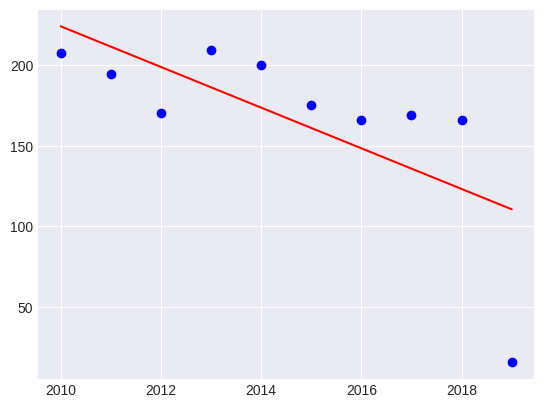

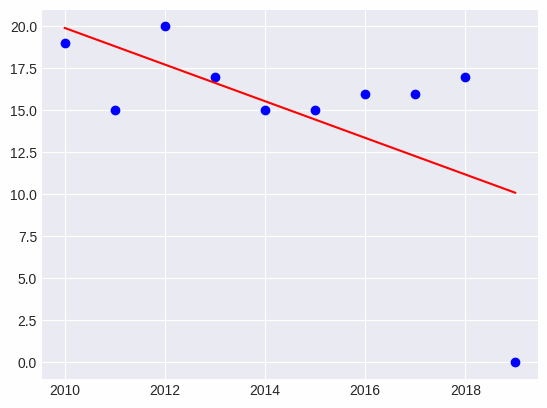

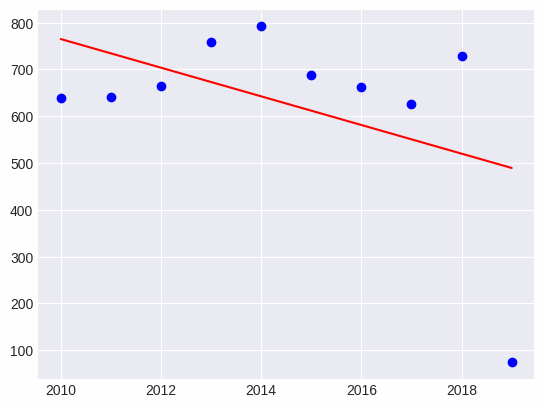

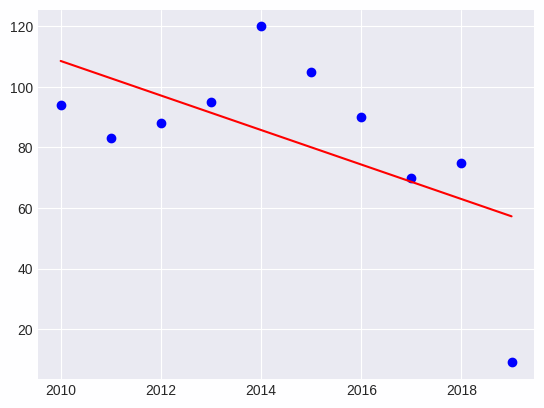

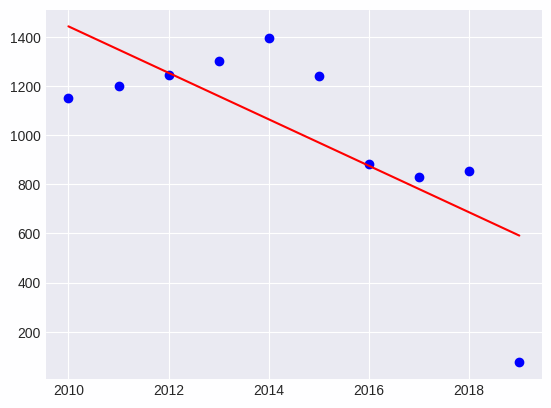

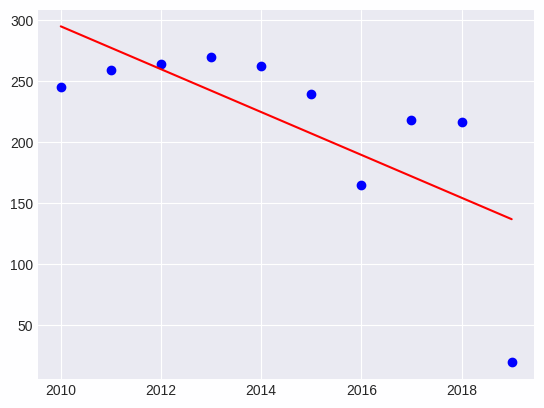

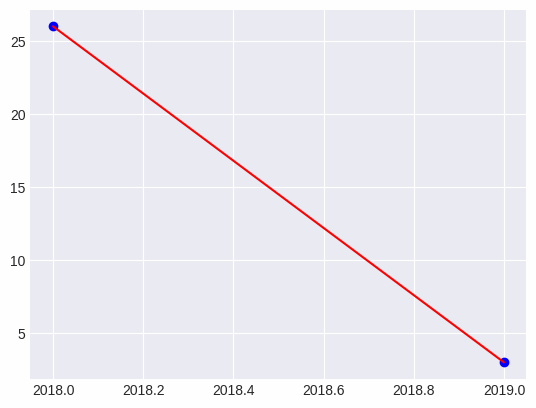

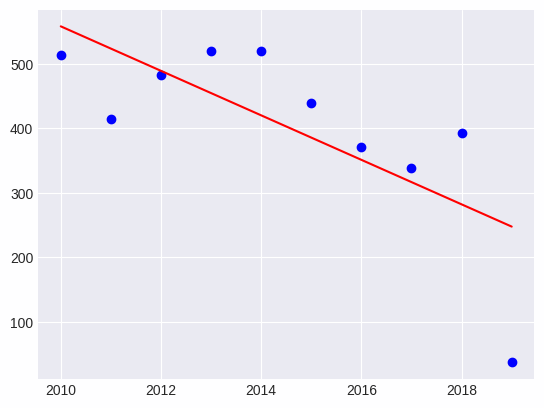

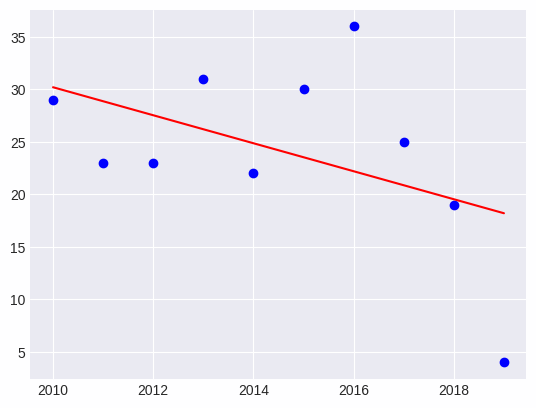

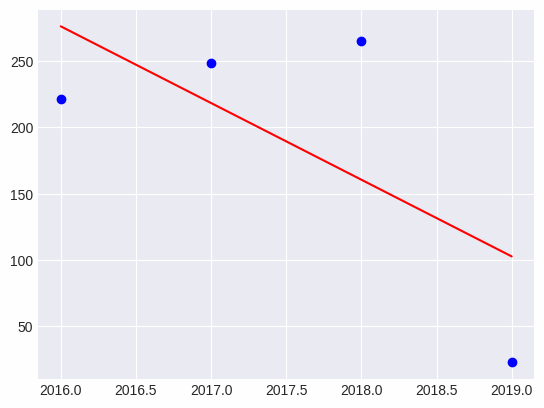

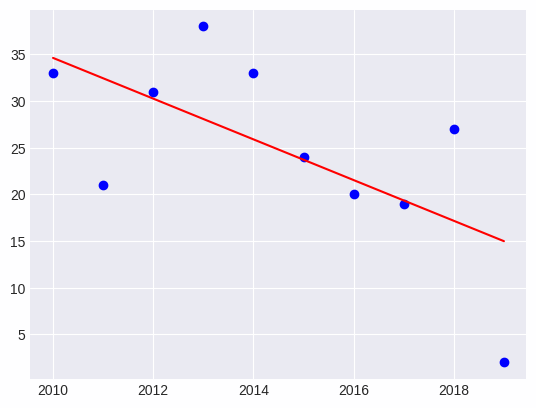

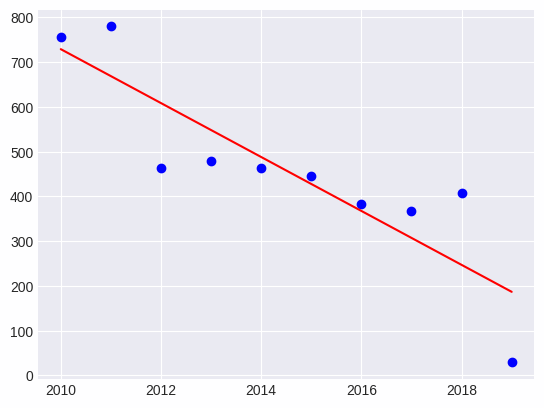

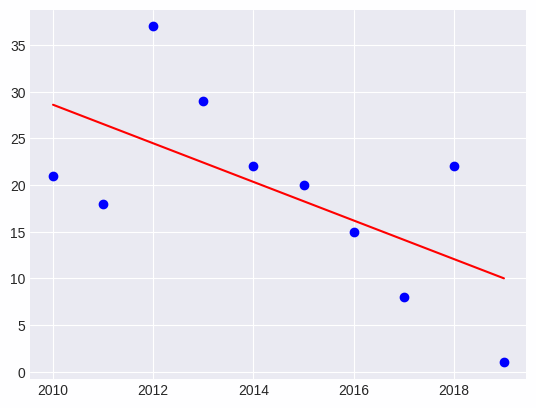

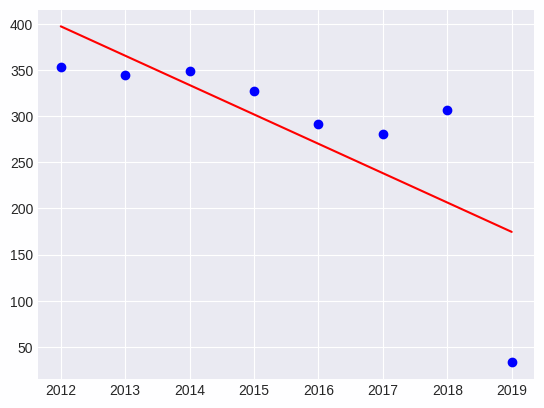

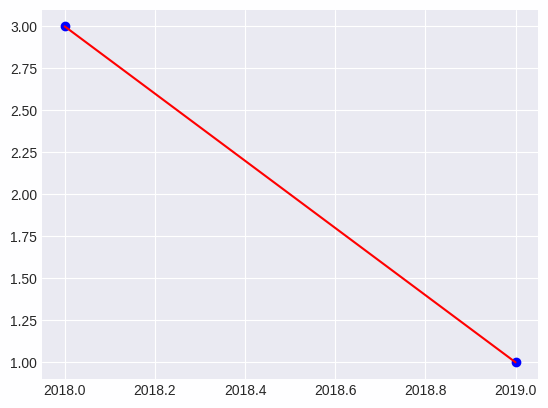

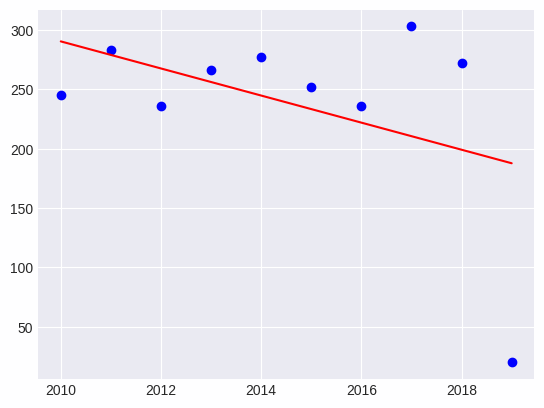

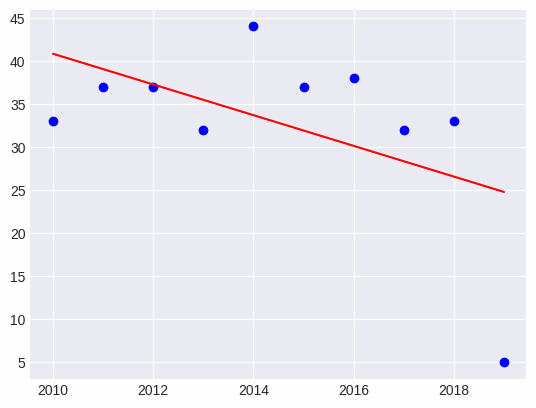

area_name
barisal division           (None, [[223.76363636363385]])
barisal metropolitan        (None, [[19.90909090909099]])
chittagong division         (None, [[764.8545454545456]])
chittagong metropolitan    (None, [[108.56363636363494]])
dhaka division             (None, [[1443.0727272727236]])
dhaka metropolitan          (None, [[294.8727272727192]])
gazipur  metropolitan                   (None, [[210.0]])
khulna division             (None, [[557.6545454545412]])
khulna metropolitan        (None, [[30.199999999999818]])
mymensingh division                     (None, [[622.0]])
railway range              (None, [[34.618181818182165]])
rajshahi division                       (None, [[729.0]])
rajshahi metropolitan      (None, [[28.600000000000364]])
rangpur division            (None, [[461.4047619047633]])
rangpur metropolitan                     (None, [[19.0]])
sylhet division             (None, [[290.3272727272706]])
sylhet metropolitan         (None, [[40.81818181818198]])
dtyp

In [ ]:
df.groupby('area_name').apply(model)

In [ ]:
fig = px.violin(df, y='dacoity', x='year', color='area_name', box=True, points='all',hover_data=df.columns, width=1000, height=400 ,template='simple_white', title= 'All crime details')
fig.show()

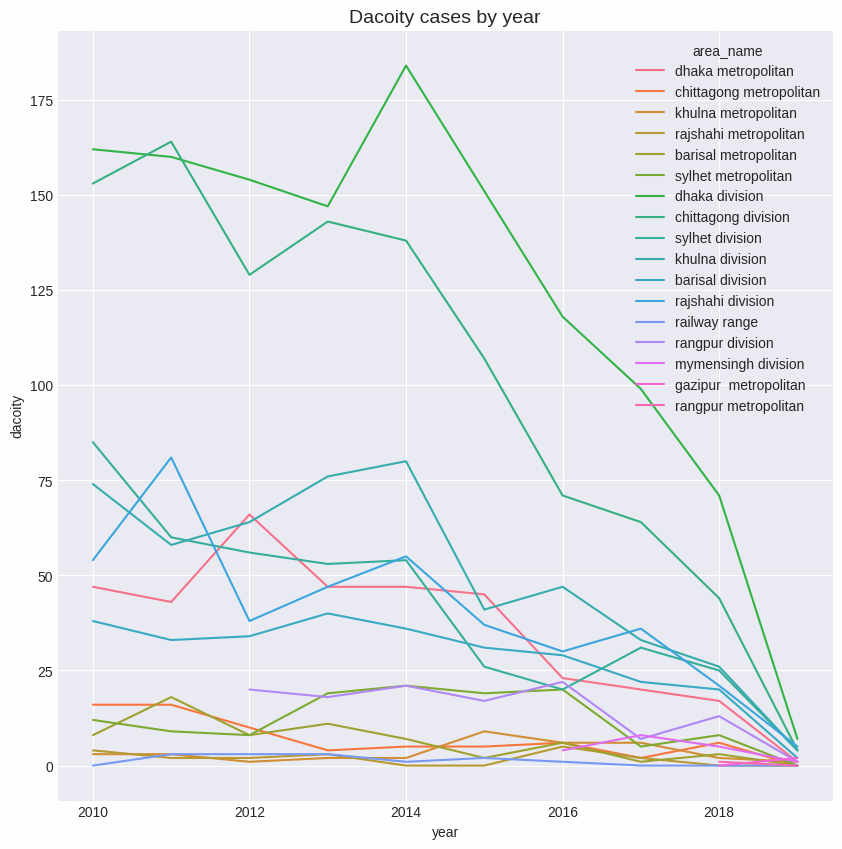

In [ ]:
plt.figure(figsize=(10,10))
sns.set_palette('inferno')
plt.title('Dacoity cases by year',fontsize=14)
sns.lineplot(x = 'year', y = 'dacoity', data = df, hue='area_name')
plt.show()

In [ ]:
plot_treemap('dacoity')

In [ ]:
df.pivot_table(index='area_name',columns='year',values='dacoity', aggfunc=(['sum']))

sum                                            \
year                      2010   2011   2012   2013   2014   2015   2016   
area_name                                                                  
barisal division          38.0   33.0   34.0   40.0   36.0   31.0   29.0   
barisal metropolitan       8.0   18.0    8.0   11.0    7.0    2.0    6.0   
chittagong division      153.0  164.0  129.0  143.0  138.0  107.0   71.0   
chittagong metropolitan   16.0   16.0   10.0    4.0    5.0    5.0    6.0   
dhaka division           162.0  160.0  154.0  147.0  184.0  151.0  118.0   
dhaka metropolitan        47.0   43.0   66.0   47.0   47.0   45.0   23.0   
gazipur  metropolitan      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
khulna division           74.0   58.0   64.0   76.0   80.0   41.0   47.0   
khulna metropolitan        3.0    3.0    1.0    2.0    2.0    9.0    6.0   
mymensingh division        NaN    NaN    NaN    NaN    NaN    NaN    4.0   
railway range              0.0    3.0    3.0    3.0    1.0    2.0    1.0   
rajshahi division         54.0   81.0   38.0   47.0   55.0   37.0   30.0   
rajshahi metropolitan      4.0    2.0    2.0    3.0    0.0    0.0    5.0   
rangpur division           NaN    NaN   20.0   18.0   21.0   17.0   22.0   
rangpur metropolitan       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
sylhet division           85.0   60.0   56.0   53.0   54.0   26.0   20.0   
sylhet metropolitan       12.0    9.0    8.0   19.0   21.0   19.0   20.0   

                                          
year                     2017  2018 2019  
area_name                                 
barisal division         22.0  20.0  2.0  
barisal metropolitan      1.0   3.0  0.0  
chittagong division      64.0  44.0  4.0  
chittagong metropolitan   2.0   6.0  0.0  
dhaka division           99.0  71.0  7.0  
dhaka metropolitan       20.0  17.0  1.0  
gazipur  metropolitan     NaN   0.0  2.0  
khulna division          33.0  26.0  4.0  
khulna metropolitan       6.0   2.0  1.0  
mymensingh division       8.0   5.0  1.0  
railway range             0.0   0.0  0.0  
rajshahi division        36.0  21.0  5.0  
rajshahi metropolitan     2.0   0.0  0.0  
rangpur division          7.0  13.0  1.0  
rangpur metropolitan      NaN   1.0  0.0  
sylhet division          31.0  25.0  4.0  
sylhet metropolitan       5.0   8.0  0.0

In [ ]:
df.rename(columns={df.columns[3]: 'robbery'}, inplace=True)

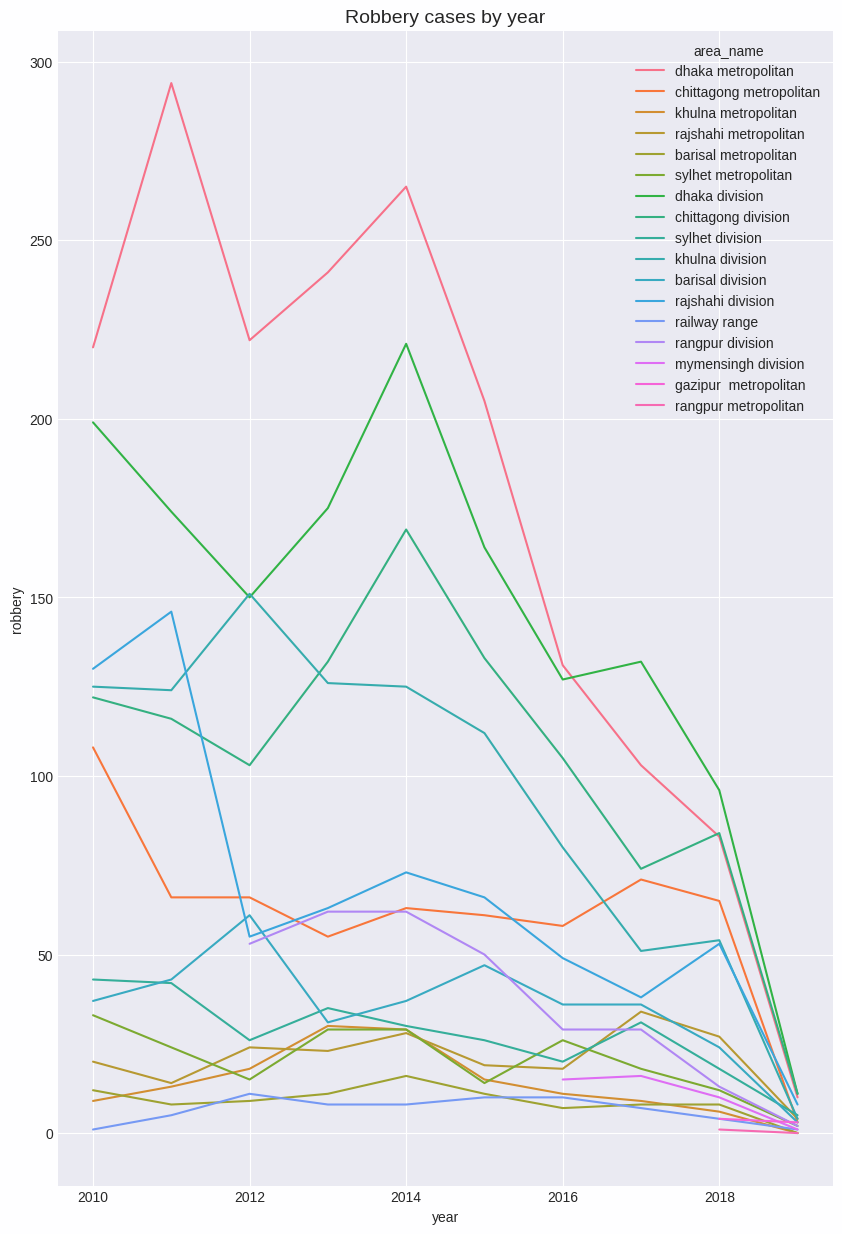

In [ ]:
plt.figure(figsize=(10,15))
sns.set_palette('inferno')
plt.title('Robbery cases by year',fontsize=14)
sns.lineplot(x = 'year', y = 'robbery', data = df, hue='area_name')
plt.show()

In [ ]:
plot_treemap('murder')

In [ ]:
df.pivot_table(index='area_name',columns='year',values='robbery', aggfunc=(['sum']))

sum                                            \
year                      2010   2011   2012   2013   2014   2015   2016   
area_name                                                                  
barisal division          37.0   43.0   61.0   31.0   37.0   47.0   36.0   
barisal metropolitan      12.0    8.0    9.0   11.0   16.0   11.0    7.0   
chittagong division      122.0  116.0  103.0  132.0  169.0  133.0  105.0   
chittagong metropolitan  108.0   66.0   66.0   55.0   63.0   61.0   58.0   
dhaka division           199.0  174.0  150.0  175.0  221.0  164.0  127.0   
dhaka metropolitan       220.0  294.0  222.0  241.0  265.0  205.0  131.0   
gazipur  metropolitan      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
khulna division          125.0  124.0  151.0  126.0  125.0  112.0   80.0   
khulna metropolitan        9.0   13.0   18.0   30.0   29.0   15.0   11.0   
mymensingh division        NaN    NaN    NaN    NaN    NaN    NaN   15.0   
railway range              1.0    5.0   11.0    8.0    8.0   10.0   10.0   
rajshahi division        130.0  146.0   55.0   63.0   73.0   66.0   49.0   
rajshahi metropolitan     20.0   14.0   24.0   23.0   28.0   19.0   18.0   
rangpur division           NaN    NaN   53.0   62.0   62.0   50.0   29.0   
rangpur metropolitan       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
sylhet division           43.0   42.0   26.0   35.0   30.0   26.0   20.0   
sylhet metropolitan       33.0   24.0   15.0   29.0   29.0   14.0   26.0   

                                            
year                      2017  2018  2019  
area_name                                   
barisal division          36.0  24.0   3.0  
barisal metropolitan       8.0   8.0   0.0  
chittagong division       74.0  84.0  11.0  
chittagong metropolitan   71.0  65.0   3.0  
dhaka division           132.0  96.0  11.0  
dhaka metropolitan       103.0  83.0  10.0  
gazipur  metropolitan      NaN   4.0   3.0  
khulna division           51.0  54.0   4.0  
khulna metropolitan        9.0   6.0   0.0  
mymensingh division       16.0  10.0   1.0  
railway range              7.0   4.0   1.0  
rajshahi division         38.0  53.0   8.0  
rajshahi metropolitan     34.0  27.0   4.0  
rangpur division          29.0  13.0   2.0  
rangpur metropolitan       NaN   1.0   0.0  
sylhet division           31.0  18.0   5.0  
sylhet metropolitan       18.0  12.0   2.0

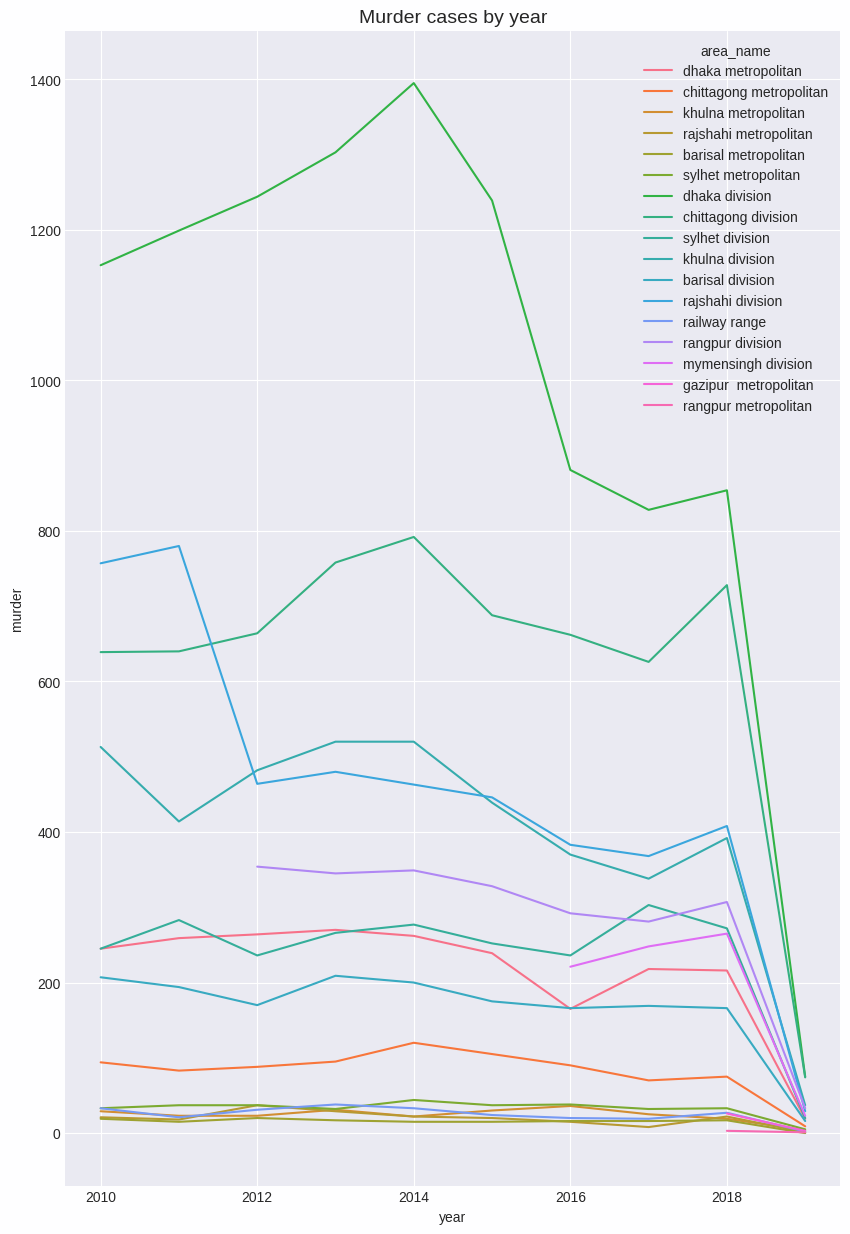

In [ ]:
plt.figure(figsize=(10,15))
sns.set_palette('inferno')
plt.title('Murder cases by year',fontsize=14)
sns.lineplot(x = 'year', y = 'murder', data = df, hue='area_name')
plt.show()

In [ ]:
plot_treemap('murder')

In [ ]:
df.pivot_table(index='area_name',columns='year',values='murder', aggfunc=(['sum']))

sum                                          \
year                       2010    2011    2012    2013    2014    2015   
area_name                                                                 
barisal division          207.0   194.0   170.0   209.0   200.0   175.0   
barisal metropolitan       19.0    15.0    20.0    17.0    15.0    15.0   
chittagong division       639.0   640.0   664.0   758.0   792.0   688.0   
chittagong metropolitan    94.0    83.0    88.0    95.0   120.0   105.0   
dhaka division           1153.0  1199.0  1244.0  1303.0  1395.0  1239.0   
dhaka metropolitan        245.0   259.0   264.0   270.0   262.0   239.0   
gazipur  metropolitan       NaN     NaN     NaN     NaN     NaN     NaN   
khulna division           513.0   414.0   482.0   520.0   520.0   439.0   
khulna metropolitan        29.0    23.0    23.0    31.0    22.0    30.0   
mymensingh division         NaN     NaN     NaN     NaN     NaN     NaN   
railway range              33.0    21.0    31.0    38.0    33.0    24.0   
rajshahi division         757.0   780.0   464.0   480.0   463.0   446.0   
rajshahi metropolitan      21.0    18.0    37.0    29.0    22.0    20.0   
rangpur division            NaN     NaN   354.0   345.0   349.0   328.0   
rangpur metropolitan        NaN     NaN     NaN     NaN     NaN     NaN   
sylhet division           245.0   283.0   236.0   266.0   277.0   252.0   
sylhet metropolitan        33.0    37.0    37.0    32.0    44.0    37.0   

                                                    
year                      2016   2017   2018  2019  
area_name                                           
barisal division         166.0  169.0  166.0  16.0  
barisal metropolitan      16.0   16.0   17.0   0.0  
chittagong division      662.0  626.0  728.0  74.0  
chittagong metropolitan   90.0   70.0   75.0   9.0  
dhaka division           881.0  828.0  854.0  75.0  
dhaka metropolitan       165.0  218.0  216.0  19.0  
gazipur  metropolitan      NaN    NaN   26.0   3.0  
khulna division          370.0  338.0  392.0  37.0  
khulna metropolitan       36.0   25.0   19.0   4.0  
mymensingh division      221.0  248.0  265.0  23.0  
railway range             20.0   19.0   27.0   2.0  
rajshahi division        383.0  368.0  408.0  29.0  
rajshahi metropolitan     15.0    8.0   22.0   1.0  
rangpur division         292.0  281.0  307.0  33.0  
rangpur metropolitan       NaN    NaN    3.0   1.0  
sylhet division          236.0  303.0  272.0  20.0  
sylhet metropolitan       38.0   32.0   33.0   5.0

# Correlations

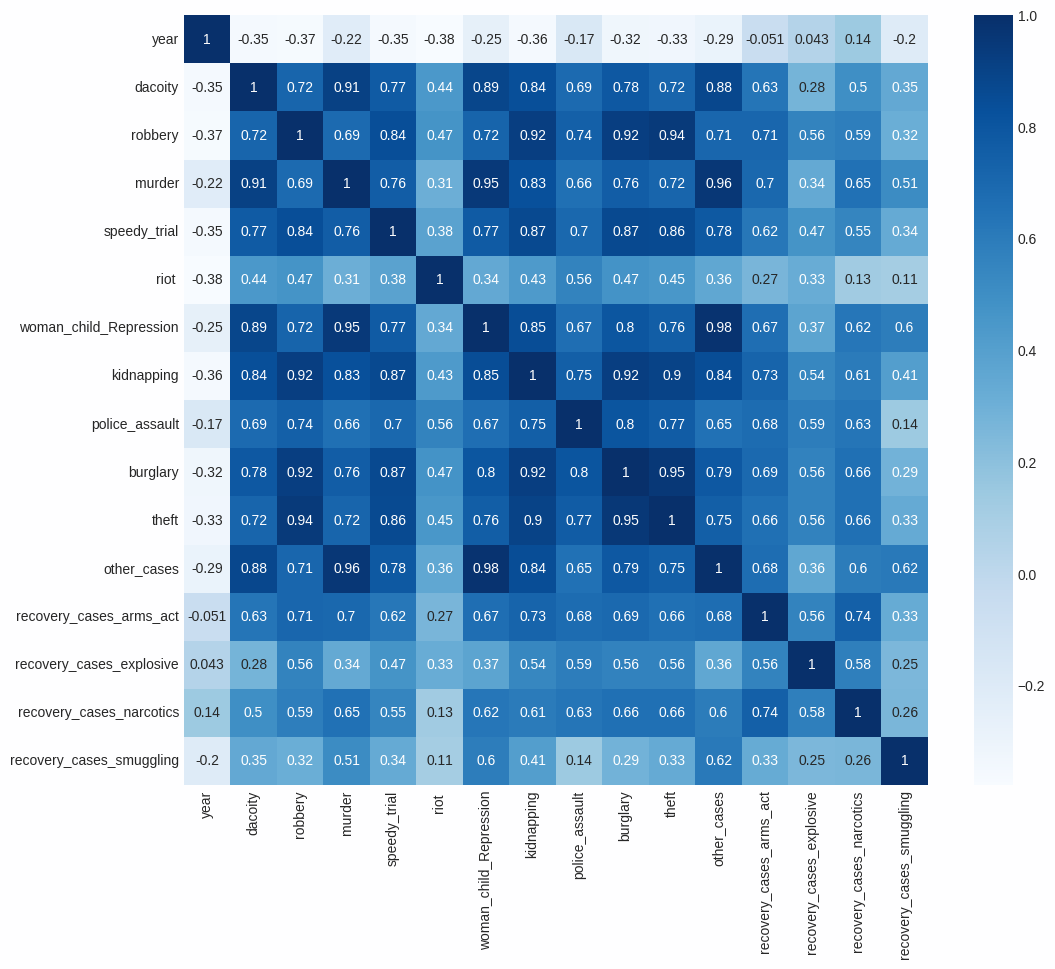

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True , cmap = "Blues")
plt.show()

# Robbery Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
df_copy = df.copy()
df_copy.dropna(inplace=True)
le = LabelEncoder()
for i in df_copy.columns:
    if df_copy[i].dtype == 'object':
        df_copy[i] = le.fit_transform(df_copy[i])
X = df_copy.drop('robbery',axis=1)
y = df_copy['robbery']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

scaler = MinMaxScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

X_train.head()

0         1         2         3         4         5         6   \
0  0.0625  0.000000  0.048780  0.014582  0.037300  0.000000  0.021896   
1  0.3125  0.222222  0.402439  0.202609  0.689165  0.196429  0.320039   
2  0.0000  0.888889  0.121951  0.127398  0.097691  0.000000  0.258260   
3  0.8750  0.888889  0.006098  0.002302  0.003552  0.000000  0.003715   
4  0.7500  0.111111  0.012195  0.013814  0.005329  0.053571  0.028543   

         7         8         9         10        11        12        13  \
0  0.029412  0.023810  0.034985  0.036193  0.024442  0.029260  0.000000   
1  0.730392  0.404762  0.862974  1.000000  0.369625  0.488812  0.242894   
2  0.098039  0.059524  0.192420  0.090706  0.221499  0.092943  0.144703   
3  0.039216  0.005952  0.004373  0.006702  0.003613  0.003442  0.002584   
4  0.078431  0.032738  0.080175  0.044236  0.029260  0.013769  0.002584   

         14        15  
0  0.004903  0.051406  
1  0.366684  0.043497  
2  0.191713  0.000879  
3  0.007024  0.000000  
4  0.009232  0.087434

In [ ]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor

In [ ]:
res = pd.DataFrame()
ls = Lasso()
lr = LinearRegression()
br = BayesianRidge()
en = ElasticNet()
xgb = XGBRegressor()
rf = RandomForestRegressor()
tree = DecisionTreeRegressor()
etree = ExtraTreesRegressor()
gb = GradientBoostingRegressor()
knn = KNeighborsRegressor()

All_Models = [lr,br,en,ls,tree,rf,etree,xgb,gb,knn]

for model in All_Models:
    print('The Model is: {}'.format(model))
    m = model.fit(X_train,y_train)
    print('Training score: {}'.format(m.score(X_train,y_train)))
    prediction = m.predict(X_test)
    print('Predictions Value: {}'.format(prediction))

    r2score = r2_score(y_test,prediction)
    mae = mean_absolute_error(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    rmse = np.sqrt(mean_squared_error(y_test,prediction))
    model_dict = {'Model Name' : model, 'R2 score':r2score,'MAE' : mae,'MSE' : mse,'RMSE' : rmse}
    res = res.append(model_dict,ignore_index=True)
    print(res)
    print('='*80)
    print('MAE: {}'.format(mae))
    print('MSE: {}'.format(mse))
    print('RMSE: {}'.format(rmse))
    print('R2 score: {}'.format(r2score))

The Model is: LinearRegression()
Training score: 0.9529120492232477
Predictions Value: [  8.74885926 124.20103488  69.19795098 218.2916861   17.14388185
  86.322131    28.81383764  40.62282189  53.36945988  20.98293428
  22.55462935   9.3230616    0.82201673  23.37115056   8.71383146
  29.17365732 181.72310792   0.21867597  15.29494329  82.62673559
   9.65604303  11.81539266 176.36393073  12.61715977  17.17172895
  15.46356669  24.10642712   8.66566567   3.87196768 170.25058796]
           Model Name  R2 score        MAE         MSE       RMSE
0  LinearRegression()  0.827407  16.008172  472.656522  21.740665
MAE: 16.008172199538855
MSE: 472.6565218686923
RMSE: 21.740665166197015
R2 score: 0.8274067038225638
The Model is: BayesianRidge()
Training score: 0.9506351854086578
Predictions Value: [ 10.77261794 130.53668751  63.67430621 206.73923555  16.96873843
  98.93589993  26.62702283  40.82097722  52.93680183  21.49606669
  19.78154593  11.35221773   2.25937595  32.62781297   8.16368446
 

In [ ]:
models = ['LinearRegression','BayesianRidge','ElasticNet','lasso','DecisionTreeRegressor','RandomForestRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','KNeighborsRegressor']
result = pd.DataFrame({'Models':models})
result['MAE'] = res['MAE']
result['MSE'] = res['MSE']
result['RMSE'] = res['RMSE']
result['R2 score'] = res['R2 score']
result = result.sort_values(by='R2 score',ascending=False)
result

Models        MAE         MSE       RMSE  R2 score
8               XGBRegressor   7.729949  123.160238  11.097758  0.955027
6        ExtraTreesRegressor   8.497333  182.716880  13.517281  0.933280
5      RandomForestRegressor   9.615000  199.188457  14.113414  0.927265
4      DecisionTreeRegressor  10.100000  221.366667  14.878396  0.919167
7  GradientBoostingRegressor   9.538733  224.999615  14.999987  0.917840
3                      lasso  10.783201  261.822624  16.180934  0.904394
1              BayesianRidge  13.476206  331.657700  18.211472  0.878893
9        KNeighborsRegressor  11.153333  430.257333  20.742645  0.842889
0           LinearRegression  16.008172  472.656522  21.740665  0.827407
2                 ElasticNet  19.893485  598.519924  24.464667  0.781447

In [ ]:
etree.fit(X_train,y_train)
y_pred = etree.predict(X_test)
out = pd.DataFrame({'murder_actual':y_test,'murder_pred':y_pred})
result = df_copy.merge(out,left_index=True,right_index=True)
result.head(10)

area_name  year  dacoity  robbery  murder  speedy_trial  riot   \
9           7  2010       74      125     513           110     15   
11         11  2010       54      130     757           276     29   
12         10  2010        0        1      33             3      1   
18         16  2011        9       24      37            42      1   
19          4  2011      160      174    1199           361     17   
27          3  2012       10       66      88            74     18   
29         12  2012        2       24      37             9      6   
30          1  2012        8        9      20             7      0   
31         16  2012        8       15      37            52      3   
36          0  2012       34       61     170           232      1   

    woman_child_Repression  kidnapping  police_assault  burglary  theft  \
9                     2275         156              25       332    947   
11                    4095         105              35       442   1442   
12                       5           5               1         2    104   
18                     158          16              16        31    129   
19                    4838         144             117       607   1731   
27                     281          27              26       112    283   
29                     122          11              15        52    136   
30                     135           5              11        40     75   
31                     140           6              28        42    116   
36                    1168          55              13       186    277   

    other_cases  recovery_cases_arms_act  recovery_cases_explosive  \
9          9954                      211                        96   
11        20654                      134                        10   
12          142                        1                         0   
18          857                        8                         0   
19        19993                      260                        25   
27         1492                      121                         5   
29          728                        5                         3   
30          600                       16                         0   
31          784                       11                         1   
36         6879                       44                        11   

    recovery_cases_narcotics  recovery_cases_smuggling  murder_actual  \
9                       2292                      1238            125   
11                      3614                      2509            130   
12                       176                       165              1   
18                       178                        32             24   
19                      7497                      1076            174   
27                      1976                        41             66   
29                       229                       130             24   
30                       459                        49              9   
31                       186                         4             15   
36                       444                        56             61   

    murder_pred  
9        144.21  
11       186.09  
12         8.60  
18        23.78  
19       192.01  
27        61.63  
29        20.62  
30        10.41  
31        20.89  
36        41.97

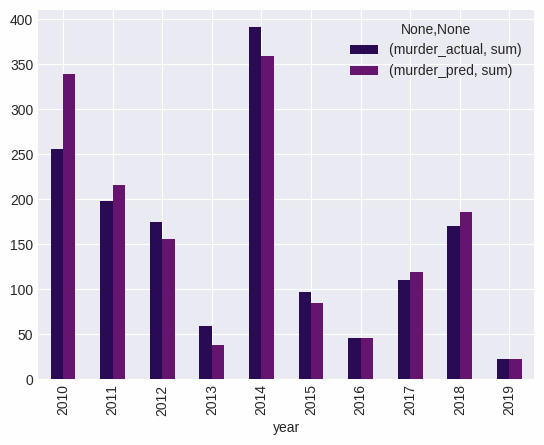

In [ ]:
result.groupby('year')[['murder_actual','murder_pred']].agg(['sum']).plot(kind='bar')
plt.show()

# Murder Prediction by XGBRegressor

In [ ]:
df.drop(columns = ['area_name'], inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns = ['robbery'])
y = df['robbery']
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
xg = XGBRegressor()
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)
train_accuracy_xg = xg.score(X_train,y_train)
test_accuracy_xg = xg.score(X_test, y_test)
print('Actual Murder:', train_accuracy_xg)
print('Murder Prediction:', test_accuracy_xg)

Actual Murder: 0.9999999997998447
Murder Prediction: 0.9346586227160291
